Problem 1 Instructions
----
Compute the requested confidence interval for the population mean given the data below. Do not use the function you create in problem set 2

#### 1.1 
Compute a 95% double-sided confidence interval (2.5% to 97.5%)

In [39]:
data = [-4.4,-10.1,1.6,4.0,3.4,-2.0,-5.8,-1.9,-3.1,1.8,-2.9,4.9,2.7,-9.5,2.8,4.3,-1.1,3.9,-9.1,5.6,1.1,-1.0,0.7,9.7,-1.6,-2.3,1.4,2.5,-9.0,1.1]

### BEGIN SOLUTION
import scipy.stats as stats
x = np.mean(data)
s = np.std(data, ddof=1)
Z = stats.norm.ppf(0.975)
print('{:.2f} +/- {:.2f}'.format(x, s * Z / np.sqrt(len(data))))
### END SOLUTION

-0.41 +/- 1.74


#### 1.2
Compute an 80% double-sided confidence interval using the data above

In [40]:
Z = stats.norm.ppf(0.90)
print('{:.2f} +/- {:.2f}'.format(x, s * Z / np.sqrt(len(data))))

-0.41 +/- 1.14


#### 1.3
Compute a 95% double-sided confidence interval using the data below.

In [41]:
data = [11.5,10.1,20.5,12.4,7.9,9.1,18.1,13.4]

### BEGIN SOLUTION
x = np.mean(data)
s = np.std(data, ddof=1)
T = stats.t.ppf(0.975, df=len(data))
print('{:.2f} +/- {:.2f}'.format(x, s * T / np.sqrt(len(data))))
### END SOLUTION

12.88 +/- 3.57


#### 1.4
Using the same data above, compute a 95% double-sided confidence assuming the population standard deviation is 5.0

In [42]:
Z = stats.norm.ppf(0.975)
print('{:.2f} +/- {:.2f}'.format(x, 5 * Z / np.sqrt(len(data))))

12.88 +/- 3.46


Problem 2 Instructions
-----

Plot the following quantities

#### 2.1
Plot a standard normal distribution. Typically, plotting from $\mu-5\sigma$ to $\mu + 5\sigma$ is a good choice when plotting normal distributions. Label your axes.

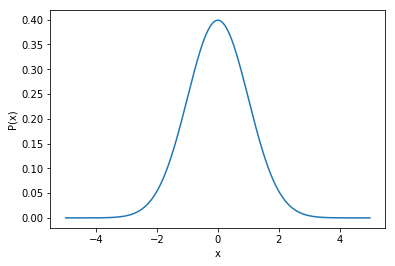

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#make some ponits
x = np.linspace(-5, 5, 500)
#plot them using the scipystats norm pdf
plt.plot(x, stats.norm.pdf(x))
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

#### 2.2
Plot the uncertainty in the population mean, $\mu - \bar{x}$ vs $P(\mu - \bar{x})$, given that we know the population standard deviation is 0.25 and we have 7 samples

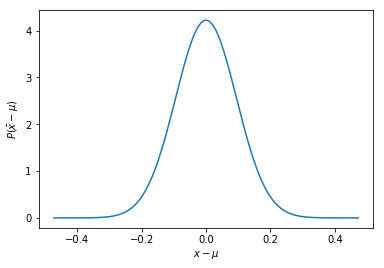

In [44]:
#get standard error from this info
se = 0.25 / np.sqrt(7)
#make 500 points from -5 sigma to 5 sigma 
x = np.linspace(-5 * se, 5 * se, 500)
plt.plot(x, stats.norm.pdf(x, scale=se))
plt.xlabel('$x - \mu$')
#prefix with r to allow curly braces
plt.ylabel(r'$P(\bar{x} - \mu)$')
plt.show()

#### 2.3
Plot the probability of the population mean with a sample mean of 3.5 and sample standard deviation of 1.2. Plot it for 3, 5, 10, and 25 samples. Be sure to create a legend

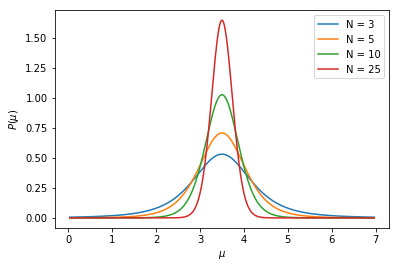

In [45]:
#make points consistent for all graphs
#use widest possible one
x = np.linspace(-5 * 1.2 / np.sqrt(3) + 3.5, 5 * 1.2 / np.sqrt(3) + 3.5, 1000)
#iterate over sample count and plot
for N in [3, 5, 10, 25]:
    se = 1.2 / np.sqrt(N)    
    plt.plot(x, stats.t.pdf(x, loc=3.5, scale=se,df=N), label='N = {}'.format(N))
plt.legend(loc='best')
plt.xlabel('$\mu$')
plt.ylabel(r'$P(\mu)$')
plt.show()

#### 2.4
Plot the probability of the population mean with a sample mean of 5, a sample standard deviation of 3.2, and 8 samples. Using the `fill_between` command, also color the area corresponding to a 95% double-sided confidence interval

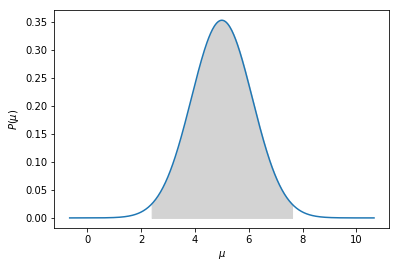

In [60]:
#get standard error from this info
se = 3.2 / np.sqrt(8)

#make 500 points from -5 sigma to 5 sigma 
x = np.linspace(-5 * se + 5, 5 * se + 5, 500)
plt.plot(x, stats.norm.pdf(x, scale=se, loc=5))
y = stats.t.ppf(0.975, df=8)
x2 = np.linspace(5 - y * se, 5 + y * se, 500)
plt.fill_between(x2,stats.norm.pdf(x2, scale=se, loc=5), color='lightgray')
plt.xlabel('$\mu$')
#prefix with r to allow curly braces
plt.ylabel(r'$P(\mu)$')
plt.show()

Problem 3 Instructions
----

State what distribution the following data follows and compute or plot the requested property.

#### 3.1

The proportion of students graduating at colleges follows a Beta distribution. Each year, a college rankings agency compiles these rates for 100 colleges and also reports the average. If the sample mean and sample standard deviation are 0.74 and 0.21, respectively, what is the population mean for all colleges with 95% confidence

In [46]:
Z = stats.norm.ppf(0.975)
print('{} +/- {:.2f}'.format(0.74, 0.21 * Z / np.sqrt(100)))

0.74 +/- 0.04


#### 3.2
The number of fatalities due to work related injuries follows a Poisson distribution at each job site. OSHA computes the average for each state taken from 45 random job sites. All numbers are in fatalities per thousand workers. Alaska has a sample mean of 7.4 a sample standard deviation of 6.0 and Texas has a sample mean of 5.3 with a sample standard deviation of 2.3. Plot the probability for the population mean number of accidents per thousand workers for these two states.

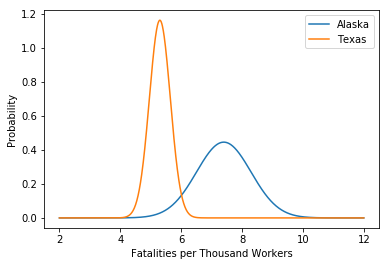

In [47]:
#get standard error from this info
se1 = 6.0 / np.sqrt(45)
se2 = 2.3 / np.sqrt(45)
#some trial and error to get this number
x = np.linspace(2, 12, 1000)
plt.plot(x, stats.norm.pdf(x, scale=se1, loc=7.4), label='Alaska')
plt.plot(x, stats.norm.pdf(x, scale=se2, loc=5.3), label='Texas')
plt.legend(loc='best')
plt.xlabel('Fatalities per Thousand Workers')
#prefix with r to allow curly braces
plt.ylabel('Probability')
plt.show()